## <a id='toc1_1_'></a>[Elimination event segmentation](#toc0_)

Trying out Meta's Segment Anything Model (SAM) to try to segment out elimination events from video frames.

With this in place, we can start with some simple rules to classify videos and possibly trim clips.

### <a id='toc1_1_1_'></a>[Setup](#toc0_)

Install SAM, setup imports and a few visualization helpers.

In [ ]:
# Uncomment to install segment anything.
#!pip install git+https://github.com/facebookresearch/segment-anything.git

In [ ]:
%matplotlib inline

import os
import pathlib
import random

from typing import List

import cv2
import matplotlib.pyplot as plt
import numpy as np

from segment_anything import SamPredictor, sam_model_registry

In [ ]:
device = "cuda"

DATA_DIR = pathlib.Path('/data/autotrim/datasets/')
FRAMES_DATA_DIR = DATA_DIR / 'frames'
COCO_DATASET_DIR = DATA_DIR / 'frames-annotated-coco'

In [ ]:
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)



def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def bbox_to_mask(bbox: List, img_h: int, img_w: int):
    left_x, top_y, bbox_w, bbox_h = bbox
    right_x = left_x + bbox_w
    bottom_y = top_y + bbox_h

    mask = np.zeros((img_h, img_w))

    mask[int(top_y):int(bottom_y),  int(left_x):int(right_x)] = 1

    return mask

### <a id='toc1_1_2_'></a>[Inference](#toc0_)

#### <a id='toc1_1_2_1_'></a>[Load pretrained model](#toc0_)

In [ ]:
sam = sam_model_registry['default'](checkpoint='./out/models/sam-checkpoints/sam_vit_h_4b8939.pth')
sam.to(device)
predictor = SamPredictor(sam)

#### <a id='toc1_1_2_2_'></a>[Load an image](#toc0_)

In [ ]:
frame = pathlib.Path(FRAMES_DATA_DIR / "mirage_4k_00025.png")
assert frame.exists(), "File not found"

In [ ]:
img = cv2.imread(frame.absolute().as_posix())
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

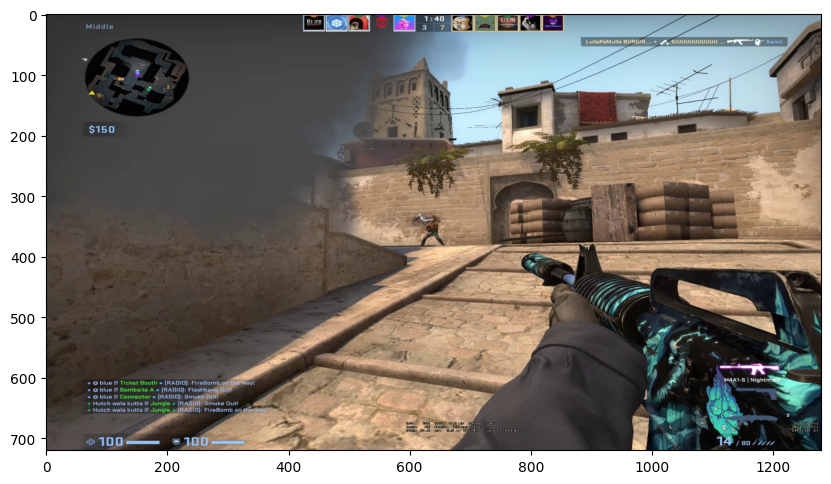

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()

#### <a id='toc1_1_2_3_'></a>[Set an input point on the image](#toc0_)

In [ ]:
predictor.set_image(img)

In [ ]:
input_point = np.array([[1000, 40]])
input_label = np.array([1])

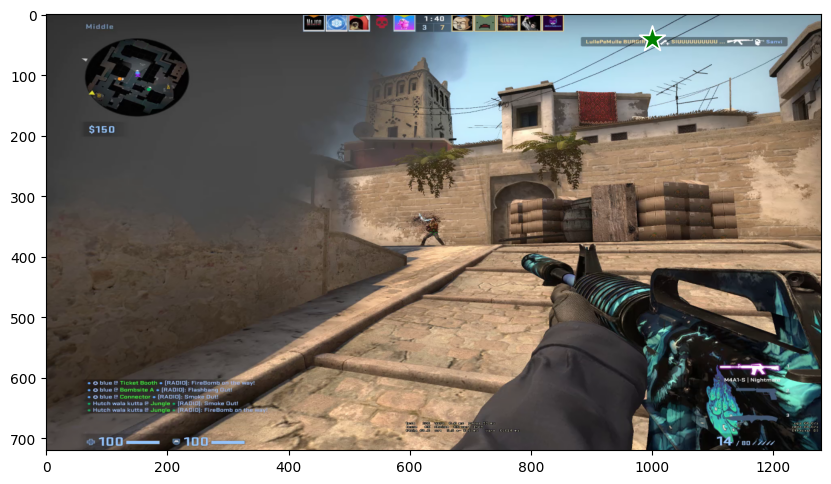

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

#### <a id='toc1_1_2_4_'></a>[Predict and show masks](#toc0_)

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [ ]:
masks.shape

(3, 720, 1280)

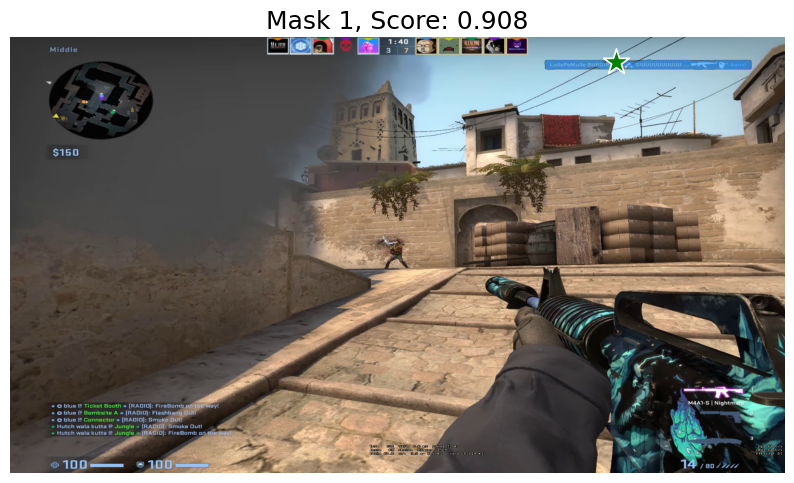

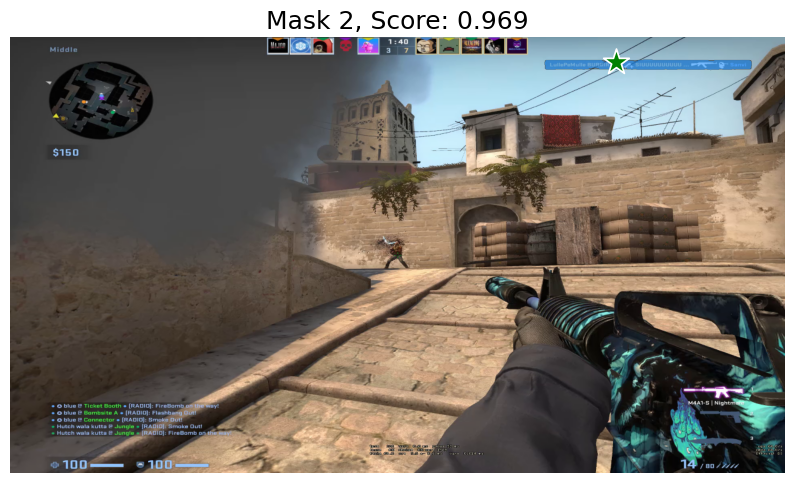

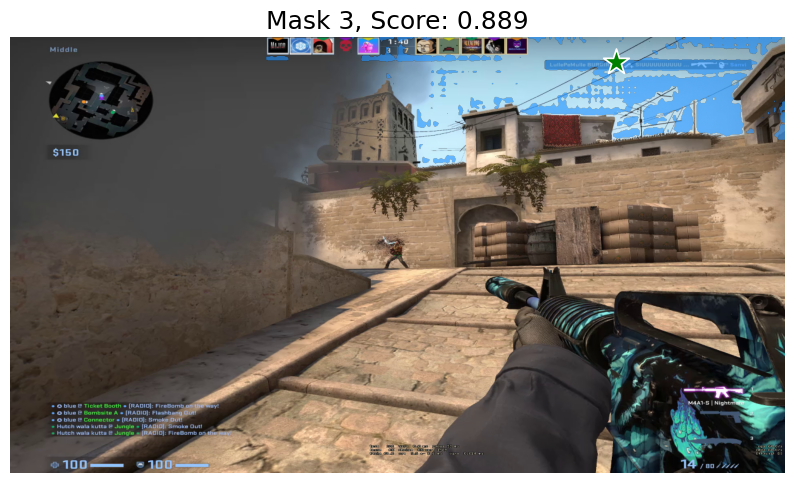

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  

In [ ]:
# Choose a random frame from the directory.
# frames = list(FRAMES_DATA_DIR.glob('*.png'))
# frame = random.choice(frames)

In [ ]:
frame = pathlib.Path('/data/autotrim/datasets/frames/mirage_4k_00071.png')
assert frame.exists(), "File not found"

In [ ]:
img = cv2.imread(frame.absolute().as_posix())
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

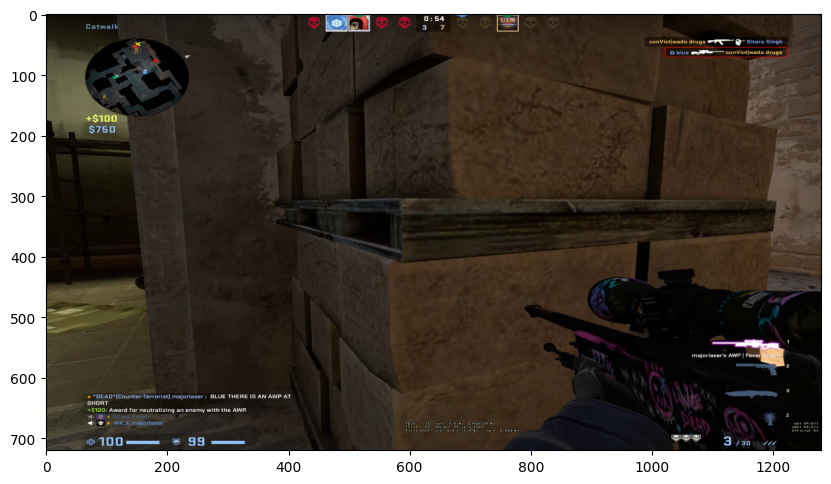

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis('on')
plt.show()

In [ ]:
input_point = np.array([[1140, 65]])
input_label = np.array([1])

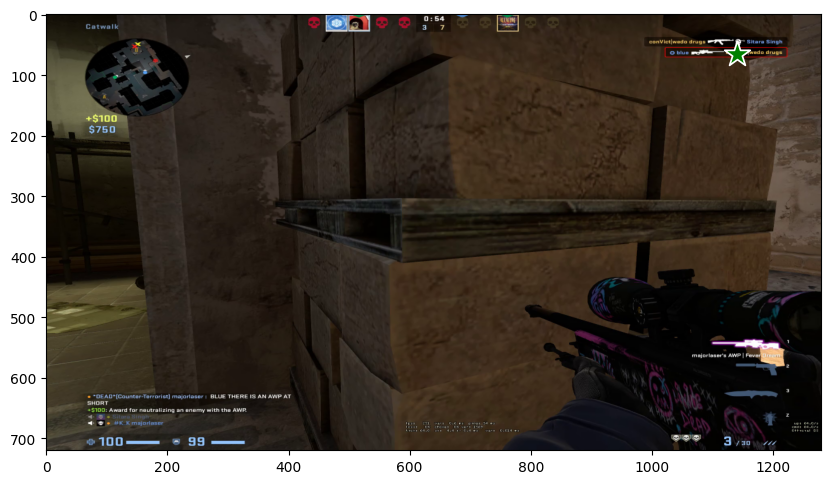

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()  

In [ ]:
masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True,
)

In [ ]:
masks.shape

(3, 720, 1280)

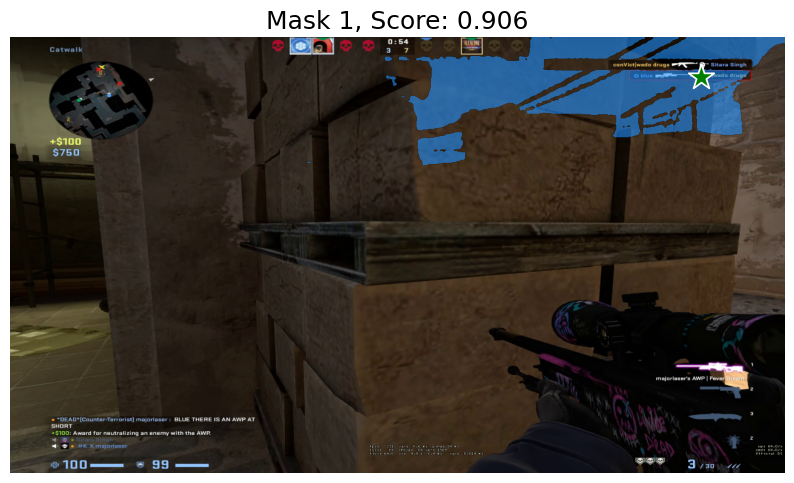

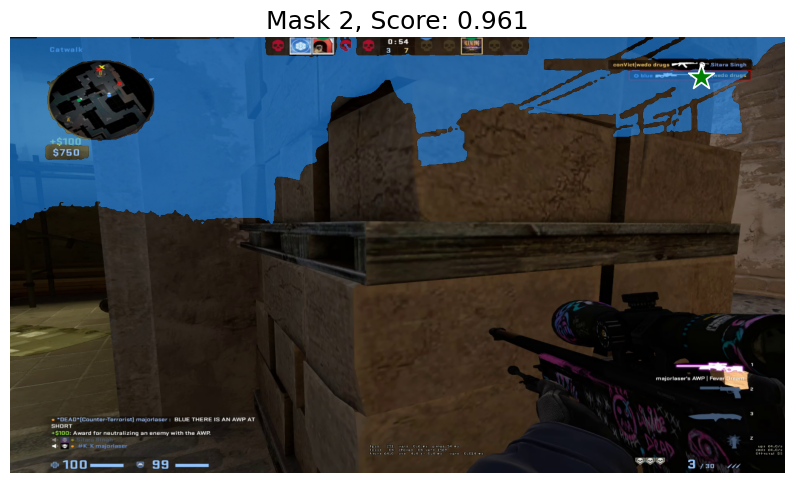

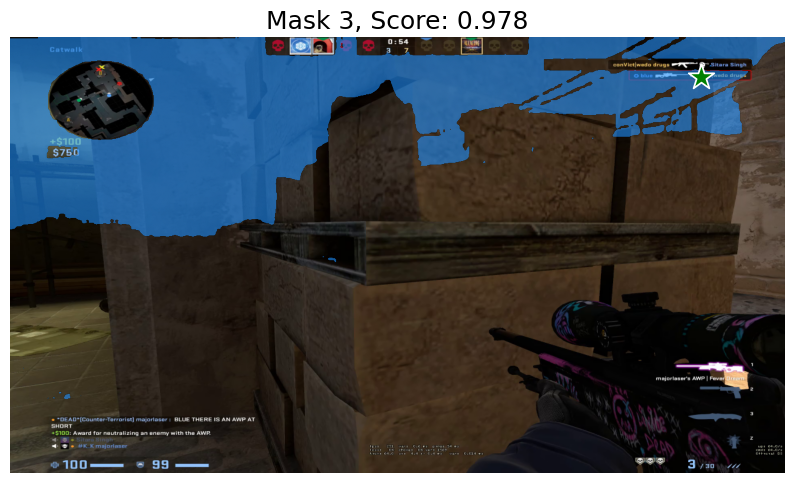

In [ ]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show()  